In [1]:
import re
from os import listdir
import networkx as nx
import numpy as np
import pandas as pd
import codecs
import csv
import matplotlib.pylab as plt
from matplotlib import rcParams
rcParams['axes.titlepad'] = 25
from datetime import datetime
import random

In [2]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [3]:
fmri = sns.load_dataset("fmri")

In [4]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


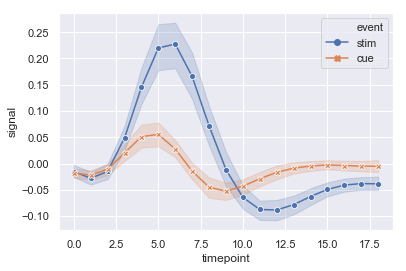

In [12]:
sns.lineplot(x="timepoint", y="signal",hue="event", style="event",markers=True, dashes=False, data=fmri)
plt.show()